In [48]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split,cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, confusion_matrix, ConfusionMatrixDisplay ,recall_score, precision_score, f1_score, classification_report

import xgboost as xgb
from lightgbm import LGBMClassifier
import lazypredict
from lazypredict.Supervised import LazyClassifier

import time
import warnings
warnings.filterwarnings('ignore')

In [50]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [51]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [52]:
from IPython.display import clear_output
!pip3 install -U lazypredict
!pip3 install -U pandas #Upgrading pandas

clear_output()

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/1205sreekar/CSD/main/data.csv")

In [54]:
df.sample(5)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
12,id_13,3890,0.00,184.05,146.07,1528,7011,0.25,0.18,165.06,...,0.07,0.02,2.98,2.55,116,41800,530.95,57819.14,95860,P
171,id_172,3830,0.00,151.54,171.10,1287,7352,0.17,0.16,161.32,...,0.11,0.02,3.49,2.51,88,51675,1915.57,128727.12,83445,H
136,id_137,9375,0.00,261.45,232.60,1613,8994,0.59,0.17,247.03,...,0.32,0.02,8.01,3.64,65,27390,1821.01,141386.36,41160,H
106,id_107,2380,0.00,150.69,170.07,1872,4892,0.41,0.16,160.38,...,0.09,0.02,3.43,2.63,106,46350,1561.18,292377.28,97400,H
91,id_92,980,0.00,250.52,184.77,1850,4617,0.22,0.18,217.64,...,0.04,0.02,1.72,1.59,209,102435,1305.88,291397.25,273675,H


In [55]:
null_= pd.DataFrame(df.isna().sum())
sum(null_)

0

In [56]:
df.select_dtypes("O").values[:5]

array([['id_1', 'P'],
       ['id_2', 'P'],
       ['id_3', 'P'],
       ['id_4', 'P'],
       ['id_5', 'P']], dtype=object)

In [57]:
df.drop(columns=["ID"],inplace=True)

<Axes: xlabel='class', ylabel='count'>

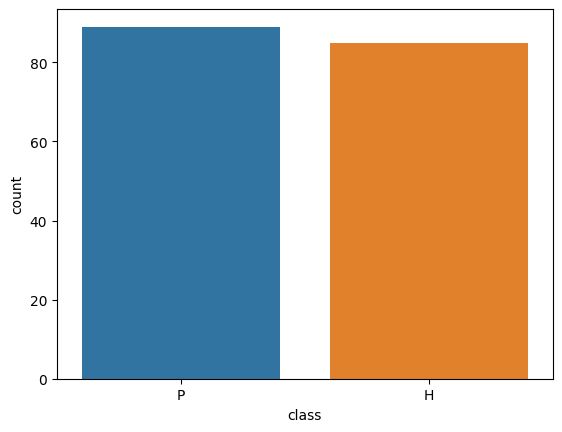

In [58]:
plt.figure()
sns.countplot(x = "class", data=df)

In [59]:
df["class"] = [1 if i == "P" else 0 for i in df["class"]]

In [60]:
correlation = df.corr().abs()["class"].drop("class")
print(correlation.sort_values(ascending=False))

gmrt_in_air7          0.46
mean_gmrt7            0.46
disp_index23          0.45
mean_speed_in_air7    0.45
paper_time9           0.45
                      ... 
max_y_extension12     0.00
mean_speed_in_air13   0.00
total_time7           0.00
num_of_pendown18      0.00
pressure_var7         0.00
Name: class, Length: 450, dtype: float64


In [61]:
variances = df.var()
threshold = 0.2
low_variance = variances[variances <= threshold].index
filtered_data = df.drop(columns = low_variance)
print("Column count before variance threshold: ",df.shape[1])
print("Column count after  variance threshold: ",filtered_data.shape[1])

Column count before variance threshold:  451
Column count after  variance threshold:  334


In [62]:
X = df.drop(columns="class")
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, shuffle=True, random_state=3)

# Scale X

"""
That point extremly important to prevent information leakedge!

"""

scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

scaler1.fit(X_train)
scaler2.fit(X_test)

X_train = pd.DataFrame(scaler1.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test  = pd.DataFrame(scaler2.transform(X_test),  index=X_test.index,  columns=X_test.columns)


print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (137, 450)
X Test  :  (37, 450)
Y Train :  (137,)
Y Test  :  (37,)


In [63]:
# Dimensionality reduction using PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [64]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)
clear_output()

In [65]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.92,0.88,0.88,0.92,0.20
BernoulliNB,0.86,0.83,0.83,0.86,0.08
RandomForestClassifier,0.84,0.80,0.80,0.83,0.46
SGDClassifier,0.81,0.80,0.80,0.81,0.14
LinearSVC,0.81,0.78,0.78,0.81,0.15
LogisticRegression,0.81,0.78,0.78,0.81,0.15
CalibratedClassifierCV,0.81,0.78,0.78,0.81,0.21
PassiveAggressiveClassifier,0.81,0.78,0.78,0.81,0.08
NearestCentroid,0.78,0.78,0.78,0.79,0.12


In [70]:
line = px.line(data_frame= models ,y =["Accuracy"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Accuracy")
line.update_traces(line_color="red")
line.update_layout(showlegend = True,
    title = {
        'text': 'Accuracy vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [71]:
line = px.line(data_frame= models ,y =["Time Taken"] , markers = True)
line.update_xaxes(title="Model",
              rangeslider_visible = False)
line.update_yaxes(title = "Time(s)")
line.update_traces(line_color="purple")
line.update_layout(showlegend = True,
    title = {
        'text': 'TIME TAKEN vs Model',
        'y':0.94,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

line.show()

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

et_classifier = ExtraTreesClassifier(n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, bootstrap=True)

et_classifier.fit(X_train, y_train)

y_pred = et_classifier.predict(X_test)

scores = cross_val_score(et_classifier, X_train, y_train, cv=5)  # cv=5 for 5-fold cross-validation

print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())
print("Standard Deviation of CV Scores:", scores.std())

Cross-Validation Scores: [0.96428571 0.89285714 0.88888889 0.88888889 0.85185185]
Mean CV Score: 0.8973544973544973
Standard Deviation of CV Scores: 0.03664379292184117


<Figure size 1000x500 with 0 Axes>

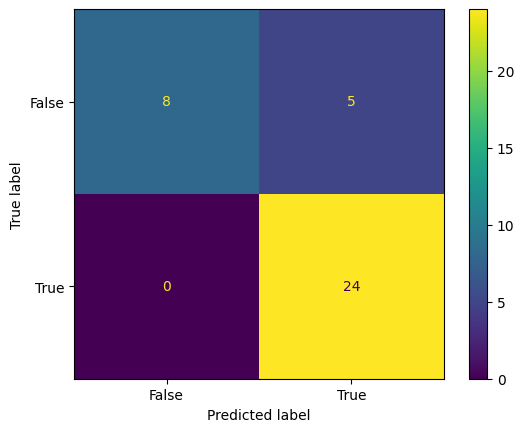

In [67]:
from sklearn import metrics
confusion_matrix =confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure(figsize = (10,5))
cm_display.plot()
plt.show()

In [68]:
# Checking the F1 score of the model
f1 = f1_score(y_test, y_pred)
print(f1)

0.9056603773584906


In [69]:
# Calculating precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8275862068965517
Recall: 1.0
